<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Final Project</div>
<div style="text-align: right">Yuchuan Lin, Zixiao Wang, 9 December 2019, with material from Dino Konstantopoulos, LouYu2015</div>

# Final Project by NB

* [Word Cloud](#Part-1:-Word-Cloud)
* [Author unique judgement](#Part-4:-Writing-Style-Analysis)

## Part 3: Word Cloud

Use jieba to extract the keywords and use the weights to draw wordcloud

In [1]:
# User jieba to find the key words
import jieba
import jieba.analyse
import matplotlib.pyplot as plt

# input_file = open("totem of wolf.txt", "r")  # Open input file
input_file = open("godFather.txt", "r")  # Open input file


# Get keyword
print('Analysing the keywords!')
tags = jieba.analyse.extract_tags(' '.join(input_file), topK=20, withWeight=True)
print('Keywords: ')
for k, v in tags:
    print('Keywords: {}   Weight: {:.3f}'.format(k, v))



Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/tg/9j43ycmj5s3byrwnwcfk3qyh0000gn/T/jieba.cache


Analysing the keywords!


Loading model cost 0.596 seconds.
Prefix dict has been built succesfully.


Keywords: 
Keywords: was   Weight: 0.281
Keywords: he   Weight: 0.261
Keywords: his   Weight: 0.259
Keywords: had   Weight: 0.196
Keywords: He   Weight: 0.163
Keywords: him   Weight: 0.139
Keywords: said   Weight: 0.122
Keywords: her   Weight: 0.120
Keywords: Don   Weight: 0.090
Keywords: Michael   Weight: 0.077
Keywords: would   Weight: 0.074
Keywords: out   Weight: 0.071
Keywords: up   Weight: 0.062
Keywords: were   Weight: 0.062
Keywords: they   Weight: 0.061
Keywords: she   Weight: 0.061
Keywords: Corleone   Weight: 0.059
Keywords: Hagen   Weight: 0.057
Keywords: me   Weight: 0.055
Keywords: so   Weight: 0.055


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

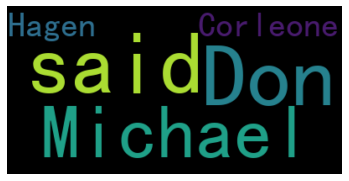

In [2]:
# 利用关键词制作图云：
from wordcloud import WordCloud
txt = ''.join([v + ',' for v, x in tags])


wordcloud = WordCloud(font_path="SimHei.ttf").generate(txt)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Final Project
* [Word Cloud](#Word-Cloud)
* [Author unique judgement](#Part-4:-Writing-Style-Analysis)

## Part 4: Writing Style Analysis - If there is any kind of Ghostwriting

![sto](http://p1.img.cctvpic.com/photoAlbum/page/performance/img/2018/9/7/1536288909577_568.jpg)

**A Dream in Red Mansions**

or another name is 

**Stroy of Stone**

The novel has 120 chapters. But there is a rumor that the last 40 chapters were written by another author.

Regarding the true authors of the last 40 times, there are still many opinions and conclusions. Some said it was Cao Xueqin's friend Gao Xun, and some said it was Cao Xueqin himself, and his post was discovered by Gao Xun and slightly modified.

#### Main thought

Uses the word frequency as the feature of each chapter return, and finally uses the "Principal Component Analysis" algorithm to map each chapter return Three-dimensional space to compare how similar the words in each chapter are.

#### Problem

1. Frequency words may change in huge step because story change
    * We count the frequency of all keyword, by calculating the frequency in each chapter
    
2. How to get a good dictionary to make right words division
    
    
#### Result of Story of Stone

![](https://pic4.zhimg.com/80/v2-14fa60d8eb2d3df74f32528c3a0e20bb_hd.png)

#### Steps

1. Preprocess
    * Throw away chars that is not a word.
    * Divide all sentences
2. Preprocess Chapters
    * Divide whole text into chapters
3. Dictionary creation
    * Create a good dictionary to make words division
4. Word Split
5. Word Count
6. Analysis

### preprocess

In simple terms, it is necessary to cut each clause according to punctuation marks, and then use a uniform symbol (here I use the pound sign) to mark the cut points.

In [10]:
import re

split_mark = "#"  # Split mark for output
filtered_chars = "『』［］[]〔〕"  # Characters to ignore
split_chars = " …《》，、。？！；：“”‘’'\n\r-=—()（）.【】"  # Characters representing split mark

input_file = open("totem of wolf.txt", "r")  # Open input file

# input_file = open("hlm.txt", "r")  # Open input file



def str_replace(string, str_from, str_to=""):
    """
    Replace str_from with str_to in string.
    """
    return str_to.join(string.split(str_from))


def str_replace_re(string, str_from, str_to=""):
    """
    Replace str_from with str_to in string.
    str_from can be an re-expression.
    """
    return re.sub(str_from, str_to, string)


def preprocessing(string):
    """
    Preprocess string.
    :return: processed string
    """
    string = str_replace_re(string, "正文 第.{1,5}回")

    for char in filtered_chars:
        string = str_replace(string, char)

    for char in split_chars:
        string = str_replace(string, char, split_mark)

    # Remove consecutive split marks
    while split_mark + split_mark in string:
        string = str_replace(string, split_mark + split_mark, split_mark)

    return string


output_file = open("preprocessing.txt", "w")

string = input_file.read()
output_file.write(preprocessing(string))

817852

### Preprocess Chapters

In [11]:
import os

chapter_folder = "./chapters"  # Folder to save result
chapter_split_mark = "$"  # Split mark to mark the end of chapter
input_file = open("totem of wolf.txt", "r")  # Open input file
# input_file = open("hlm.txt", "r")  # Open input file

# Create result folder
if not os.path.exists(chapter_folder):
    os.makedirs(chapter_folder)

# Split chapters
string = input_file.read()
print(string)
string = str_replace_re(string, "正文 第.{1,5}回", chapter_split_mark)
chapters = string.split(chapter_split_mark)

# Save chapters
for chapter_no, chapter_string in enumerate(chapters):
    print(chapters)
    if chapter_no == 0:
        continue
    result = preprocessing(chapter_string)
    file_name = os.path.join(chapter_folder, "%d.txt" % chapter_no)
    chapter_file = open(file_name, "w")
    chapter_file.write(result)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Dictionary creation

We still need to find out what content is like words in the article before we can determine how to segment. So we need to make a vocabulary dictionary. But sometime words will stick to each others. Like "yellow dog", "that man"

But we can use solidification and freedom to value if the vocabulary is good.

#### Degree of solidification

**If the probability of fragments actually appearing is many times higher than the probability of being randomly combined, it means that such combinations should not be accidentally generated**, but have some correlation. This association is probably because the segment is an indivisible whole, that is, a word.

If P (AB) is the frequency of the fragment, P (A) is the frequency of the words on the left of the fragment, and P (B) is the frequency of the words on the right, then the degree of solidification co is

![](https://www.zhihu.com/equation?tex=co+%3D+%5Cfrac%7BP%28AB%29%7D%7BP%28A%29+%5Ccdot+P%28B%29%7D)

#### Degree of freedom

To rule out incomplete words, we can use the concept of degrees of freedom to continue filtering. [Words divination method based on Information Entropy](https://www.cnblogs.com/bigdatafly/p/5014597.html)

**If a combination is an incomplete word, it always appears as part of the complete word**, so the adjacent words will be relatively fixed.

Because adjacent words are divided into left and right sides, degrees of freedom are also divided into left and right parts. Taking the degree of freedom on the left as an example, the calculation formula is the total information entropy of the frequency of each word on the left adjacent word. That is, if [formula] is the left degree of freedom and [formula] to [formula] are the frequencies of each left adjacent word, then:

![](https://www.zhihu.com/equation?tex=H_%7Bleft%7D+%3D+-%5Csum_%7Bi%3D1%7D%5En%7Bp_i+%5Ccdot+%5Clog_2%7Bp_i%7D%7D)

#### The fomula of score

![](https://www.zhihu.com/equation?tex=score+%3D+co+%5Ccdot+%28H_%7Bleft%7D+%2B+H_%7Bright%7D%29)


By doing this, we can get a dictionary that the words are not too sticky and contain right works as much as possible 

In [12]:
import suffix_tree
import copy
import math

split_mark = "#"
word_split_mark = "/"

input_file = open("preprocessing.txt", "r")

# Threshold for filters
MIN_COUNT = 5
MIN_ENTROPY = 1.
MIN_SCORE = 100.
MIN_CO = 1.


def load():
    return input_file.read()


def construct_tree(string):
    tree = suffix_tree.SuffixTree(string + "$")
    tree.update_counter()
    return tree


def count_sentence_length(string):
    """
    Count number of sentences for each sentence length.

    :return: count. There are count[i] sentences with length i.
    """
    sentences = string.split(split_mark)
    length = [len(string) for string in sentences]
    max_length = max(length)

    count = [0]*(max_length+1)
    for l in length:
        count[l] += 1

    return count


def count_all_possibilities(sentence_length_count, word_length):
    """
    :return: How many combinations are there with length word_length.
    """
    count_sum = 0
    for length, count in enumerate(sentence_length_count):
        if length >= word_length:
            count_sum += count*(length - word_length + 1)
    return count_sum


def new_cursor(tree, branch):
    return suffix_tree.Cursor(tree.root, branch, 0, tree.root)


def entropy_of_list(nodes):
    """
    Calculate entropy from a list of nodes.

    :return: entropy.
    """
    node_counts = [node.counter if str(node)[0] != split_mark else 1.
                   for node in nodes]
    count_sum = sum(node_counts)
    probs = [count/count_sum for count in node_counts]

    entropy = -sum([prob*math.log(prob, 2) for prob in probs])

    for node in nodes:
        if str(node)[0] == split_mark \
              and node.counter >= 0.5 * count_sum + node.counter - 1:
            return max(entropy, MIN_ENTROPY + 0.00001)

    return entropy


def mark_words(tree, reversed_tree, count_of_length, cursor, string):
    if split_mark in string:
        return

    if cursor.current_node.counter >= MIN_COUNT:  # Filter by count
        if len(string) > 1:
            # Calculate co
            p_no_split = cursor.current_node.counter/count_of_length[len(string)]

            left_part = new_cursor(tree, string[0])
            right_part = copy.copy(cursor)
            right_part.move_front_forward(string[0])
            p_split = []
            for i in range(1, len(string)):
                p_left = left_part.current_node.counter/count_of_length[i]
                p_right = right_part.current_node.counter/count_of_length[len(string) - i]
                p_split.append(p_left*p_right)

                if i != len(string) - 1:
                    left_part.move_forward(string[i])
                    right_part.move_front_forward(string[i])
            # End of for i in range(1, len(string))

            co = p_no_split/max(p_split)

            if co >= MIN_CO:  # Filter by co
                # Calculate entropy
                reverse_lookup = reversed_tree.query_cursor(string[::-1])
                if reverse_lookup.length + 1 == len(reverse_lookup.current_node):
                    left_entropy = entropy_of_list(reverse_lookup.current_node.next.values())
                else:
                    left_entropy = 0
                right_entropy = entropy_of_list(cursor.current_node.next.values())

                # Calculate score
                score = co*(left_entropy+right_entropy)

                # Filter by score and entropy
                if score > MIN_SCORE and left_entropy > MIN_ENTROPY and right_entropy > MIN_ENTROPY:
                    output_file.write("%s,%d,%f,%f,%f,%f,%f\n" % (string, cursor.current_node.counter, co, left_entropy, right_entropy, left_entropy+right_entropy, score))
            # End of if co >= MIN_CO
        # End of if len(string) > 1

        # Recursively find vocabulary in child nodes
        for key, child in cursor.current_node.next.items():
            next_cursor = suffix_tree.Cursor(cursor.current_node, key, len(child), tree.root)
            mark_words(tree, reversed_tree, count_of_length, next_cursor, string + str(next_cursor.current_node))
    # End of if cursor.current_node.counter >= MIN_COUNT
# End of def mark_words

output_file = open("dict.csv", "w")
string = load()
print("Building tree")
tree = construct_tree(string)
print("Building tree for reversed string")
reversed_tree = construct_tree(string[::-1])

print("Counting sentences")
sentence_length_count = count_sentence_length(string)
count_of_length = [count_all_possibilities(sentence_length_count, i)
                   for i in range(len(sentence_length_count))]

print("Finding words")
process_update_interval = len(tree.root.next)//20
for i, (key, child) in enumerate(tree.root.next.items()):
    if i % process_update_interval == 1:
        print("|", end="", flush=True)

    cursor = suffix_tree.Cursor(tree.root, key, len(child), tree.root)
    mark_words(tree, reversed_tree, count_of_length, cursor, str(cursor.current_node))
print()



Building tree
|||||||||||||||||||||
Building tree for reversed string
|||||||||||||||||||||
Counting sentences
Finding words
|||||||||||||||||||||


### Word Split

In [13]:
import dict_creat
import suffix_tree

split_mark = "#"

friendly_split_mark = "，"
word_split_mark = "/"

input_file = open("preprocessing.txt", "r")
dict_file = open("dict.csv", "r")

long_word_punishment = 1000


def load():
    return input_file.read()


def construct_tree(string):
    tree = suffix_tree.SuffixTree(string)
    tree.update_counter()
    return tree


def load_dict():
    dictionary = dict()
    lines = dict_file.read().split("\n")
    count_sum = 0
    for line in lines:
        if line:
            cols = line.split(",")
            dictionary[cols[0]] = int(cols[1])*float(cols[-1])
            count_sum += int(cols[1])
    return {key: value/count_sum for key, value in dictionary.items()}


def get_prob(tree, dictionary, sentence_length_count, string):
    """
    Get the probability that string is a word.
    :return: probability
    """
    try:
        current_word_prob = dictionary[string]
    except KeyError:
        current_word_count = tree.query(string).counter
        current_word_prob = current_word_count / dict_creat.count_all_possibilities(sentence_length_count, len(string))

        if current_word_count == 1:
            for i in range(len(string)-1):
                current_word_prob /= long_word_punishment

    return current_word_prob


def split(tree, dictionary, sentence_length_count, string):
    """
    Split string to words.

    :return: words
    """
    prob = [1]  # Probability for the best split
    last_word_index = [0]  # Position for best split of last word

    # Calculate probability
    for i in range(1, len(string)+1):
        max_prob = -1
        max_prob_candidate = None
        for candidate in range(max(0, i-4), i):
            current_word = string[candidate: i]
            current_prob = prob[candidate]*get_prob(tree, dictionary, sentence_length_count, current_word)

            if current_prob > max_prob:
                max_prob = current_prob
                max_prob_candidate = candidate

            # print("[%d:%d]%s/%s:%.10f" % (candidate, i, last_word, current_word, current_prob))

        prob.append(max_prob)
        last_word_index.append(max_prob_candidate)

    # Get result
    result = []
    cursor = len(string)
    while cursor != 0:
        prev = last_word_index[cursor]
        result.append(string[prev: cursor])
        cursor = prev
    return list(reversed(result))


def split_all(tree, dictionary, sentence_length_count, string, out_file, show_progress=True):
    all_list = string.split(split_mark)
    progress_update_interval = len(all_list)//20
    for i, s in enumerate(all_list):
        out_file.write(word_split_mark.join(split(tree, dictionary, sentence_length_count, s)))
        out_file.write(friendly_split_mark)

        if i % progress_update_interval == 1 and show_progress:
            print("|", end="", flush=True)
    if show_progress:
        print()

    out_file.write("\n\n")



print("Loading dictionary")
dictionary = load_dict()

print("Building tree")
string = load()
tree = construct_tree(string)
sentence_length_count = dict_creat.count_sentence_length(string)

print("Processing")
output_file = open("word_split.txt", "w")
split_all(tree, dictionary, sentence_length_count, string, output_file)





Loading dictionary
Building tree
|||||||||||||||||||||
Processing
|||||||||||||||||||||


### Word Split Chapter

In [14]:
import dict_creat
import os

chapter_folder = "chapters"
result_folder = "chapters_split"
number_of_chapters = 72
# number_of_chapters = 120
input_file = open("preprocessing.txt", "r")



if not os.path.exists(result_folder):
    os.mkdir(result_folder)

print("Loading dictionary")
dictionary = load_dict()

print("Building tree")
string = load()
tree = construct_tree(string)
sentence_length_count = dict_creat.count_sentence_length(string)

print("Processing")
progress_update_interval = number_of_chapters//20
for chapter_no in range(1, number_of_chapters+1):
    if chapter_no % progress_update_interval == 1:
        print("|", end="", flush=True)

    input_file = open(os.path.join(chapter_folder, "%d.txt" % chapter_no), "r")
    output_file = open(os.path.join(result_folder, "%d.txt"% chapter_no), "w")
    string = input_file.read()
    split_all(tree, dictionary, sentence_length_count, string, output_file, show_progress=False)
print()





Loading dictionary
Building tree
|||||||||||||||||||||
Processing
||||||||||||||||||||||||


### Word Count

In [15]:
input_file = open("word_split.txt", "r")
output_file = open("word_count.csv", "w")

word_split_mark = "/"
split_mark = "，"

counter = dict()


# Split words
string = input_file.read()
string = ''.join(string.split("\n"))

string = word_split_mark.join(string.split(split_mark))
words = string.split(word_split_mark)

# Count words
for word in words:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1

# Sort words
table = list(counter.items())
table.sort(key=lambda x: x[1], reverse=True)

# Save result
for row in table:
    if len(row[0]) > 1:
        output_file.write("%s,%d\n" % (row[0], row[1]))


### Word Count Chapters

In [16]:
import os
import math

word_split_mark = "/"
split_mark = "，"

number_of_chapters = 72
# number_of_chapters = 120
input_folder = "chapters_split"


def variance(array):
    """
    Calculate variance of a list of numbers.
    """
    mean = sum(array)/len(array)

    result = 0
    for number in array:
        result += abs(number - mean)**2
    return math.sqrt(result/len(array))


def count_word_for_chapter(counter, chapter_no, words):
    for word in words:
        if len(word) <= 1:
            continue

        if word in counter:
            counter[word][chapter_no-1] += 1
        else:
            counter[word] = [0]*number_of_chapters
            counter[word][chapter_no-1] = 1


def count_all_chapter():
    counter = dict()

    for chapter_no in range(1, number_of_chapters + 1):
        input_file = open(os.path.join(input_folder, "%d.txt" % chapter_no), "r")
        string = input_file.read()
        string = ''.join(string.split("\n"))

        string = word_split_mark.join(string.split(split_mark))
        words = string.split(word_split_mark)

        count_word_for_chapter(counter, chapter_no, words)

    return counter


def save_data(counter, output_file):
    table = list(counter.items())
    table.sort(key=lambda x: sum(x[1]), reverse=True)

    for row in table:
        if len(row[0]) > 1:
            output_file.write(row[0] + ",")
            for number in row[1]:
                output_file.write("%d," % number)

            row_variance = variance(row[1])
            output_file.write("%d,%f,%f\n" % (sum(row[1]), row_variance, row_variance/sum(row[1])))


output_file = open("word_count_chapters.csv", "w")
counter = count_all_chapter()
save_data(counter, output_file)



### Analysis 

1. To remove the effect of the plot on the analysis results, we count the words in each chapter and find the words that change their frequence not too much

In [17]:
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib

import random

number_of_chapters = 72  # Number of chapters
# number_of_chapters = 120
ignored_words = ["笑道", "宝玉"]  # Words to ignore
randomly_choose_training_samples = False  # Choose training samples for PCA randomly
training_samples_portion = 0.5  # Portion of training samples
adjust_prob = True  # Adjust probability for 1-79 chapters


def split_data(data_frame, prob=0.5):
    if not randomly_choose_training_samples:
        print("Training chapters: all")
        return data_frame

    training_data = []
    training_chapters = []
    for i, line in enumerate(data_frame):
        if adjust_prob:
            adjusted_prob = prob/2 if i < 80 else prob
        else:
            adjusted_prob = prob

        if random.random() < adjusted_prob:
            training_data.append(line)
            training_chapters.append(i)

    print("Training chapters:", training_chapters)
    return np.array(training_data)


def save_components(components, features):
    output_file = open("components.csv", "w")
    for i, feature in enumerate(features):
        output_file.write("%s," % feature)
        for component in components:
            output_file.write("%f," % component[i])
        output_file.write("\n")


def plot_result(result):
    figure = plt.figure()
    # plot = figure.add_subplot(111)
    plot = Axes3D(figure)
    plot.set_xlabel("component 1")
    plot.set_ylabel("component 2")
    plot.set_zlabel("component 3")

    for i, line in enumerate(result):
        # r = min(i/60, 1)
        # g = min(2-i/60, 1)
        # b = 0
        #
        # r, g = g, r
        #
        # color = (r, g, b, 0.5)

        # if i > 80:
        #     marker = "s"
        #     color = "b"
        # elif i > 40:
        #     marker = "^"
        #     color = "r"
        # else:
        #     marker = "o"
        #     color = "g"
        marker = "o"
        alpha = 0.5

        if i > 80:
            color = (0, 0, 1, alpha)
        elif i > 40:
            color = (0, 1, 0, alpha)
        else:
            color = (1, 0, 0, alpha)

        # if i > 100:
        #     color = (1, 0, 1, alpha)
        # elif i > 80:
        #     color = (0, 0, 1, alpha)
        # elif i > 60:
        #     color = (0, 1, 1, alpha)
        # elif i > 40:
        #     color = (0, 1, 0, alpha)
        # elif i > 20:
        #     color = (1, 1, 0, alpha)
        # else:
        #     color = (1, 0, 0, alpha)

        # plot.text(line[0], line[1], str(i+1), size=10, ha="center", va="center")
        # plot.scatter(line[0], line[1], marker=marker, c=color, s=200, linewidths=0)

        plot.text(line[0], line[1], line[2], str(i+1), size=10, ha="center", va="center")
        plot.scatter(line[0], line[1], line[2], marker=marker, c=color, s=200, linewidths=0)
    plt.show()


# output_file = open("pca.csv", "w")

feature_names = []  # Words that are used as features
counter = count_all_chapter()

# Build data frame
data_frame = [list() for _ in range(number_of_chapters)]
for word, counts in counter.items():
    # Filter features
    normalized_variance = variance(counts)/(sum(counts)/number_of_chapters)
    if normalized_variance > 0.85 or word in ignored_words:
        continue

    # Add to data frame
    for i in range(number_of_chapters):
        data_frame[i].append(counts[i])
    feature_names.append(word)

    # output_file.write("%s,%f\n" % (word, normalized_variance))
data_frame = np.array(data_frame)

# output_file.close()
# exit()

# Start PCA
pca = decomposition.PCA(n_components=3, whiten=True, svd_solver="full")
pca.fit(split_data(data_frame))
result = pca.transform(data_frame)

save_components(pca.components_, feature_names)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Features:", feature_names)
print("Number of Features:", len(feature_names))

# save_result_csv(result, output_file)

plot_result(result)

Using matplotlib backend: MacOSX


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Training chapters: all
Explained variance ratio: [0.80266496 0.0633963  0.03598306]
Features: ['\t\t', '的时候', '蒙古草原', '陈阵', '但是', '草原上', '没有', '额仑草原', '可是', '一个', '蒙古', '就是', '然后', '要是', '草原', '以后', '他们']
Number of Features: 17


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
